In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_bonds()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-25 to 2019-06-04'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 4) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
MUB,49,1.067598,0.398244,2.246773,0.409122
VTEB,49,1.081739,0.405533,2.241262,0.333713
VCIT,49,1.165268,0.661761,1.499686,0.502684
LQD,49,1.331217,0.873500,1.326141,0.743382
VCLT,49,1.873830,1.283240,1.325548,1.036422
BLV,49,2.041889,1.503917,1.242792,1.732519
VCSH,49,0.555295,0.311864,1.226374,0.282660
PGX,49,0.680772,0.414408,1.225696,1.237112
BND,49,0.934804,0.626915,1.215429,0.703167


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['MUB', 'VTEB'] -2.3541868104615586 1.9481385946212995 0.185708812622997 -4.488034217705855
['MUB', 'VCIT'] -2.6822445445413994 0.8362628316553984 0.22795142422600606 -3.746458800422804
['MUB', 'LQD'] -2.899338865961136 0.3854485615736434 0.28812597108692173 -3.572913398621701
['MUB', 'VCLT'] -2.9958400011973962 0.21509446644667385 0.36138611031545476 -3.572320577959525
['MUB', 'PGX'] -3.827029949500796 -0.7661200946528055 0.41155855302381983 -3.47246840787181


['MUB', 'PGX']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['BND', 'PGX'], 0, 1)

['PGX', 'MUB'] -3.827029949500796 -0.7661200946528055 0.41155855302381983 -3.47246840787181


['PGX', 'MUB']

In [5]:
quote.setup_mask(['PGX', 'MUB'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 PGX    0.485817
 MUB    0.514183
 dtype: float64, 0.8797, 0.2256)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,49.0,0.877230,0.225837,0.406553,0.730859,0.901849,1.050200,1.272276,3.119041,0.344844
MUB,49.0,1.067598,0.398244,0.256944,0.781171,1.125391,1.368073,1.685346,2.246773,0.409122
PGX,49.0,0.680772,0.414408,-0.362674,0.446277,0.599909,0.968863,1.719726,1.225696,1.237112


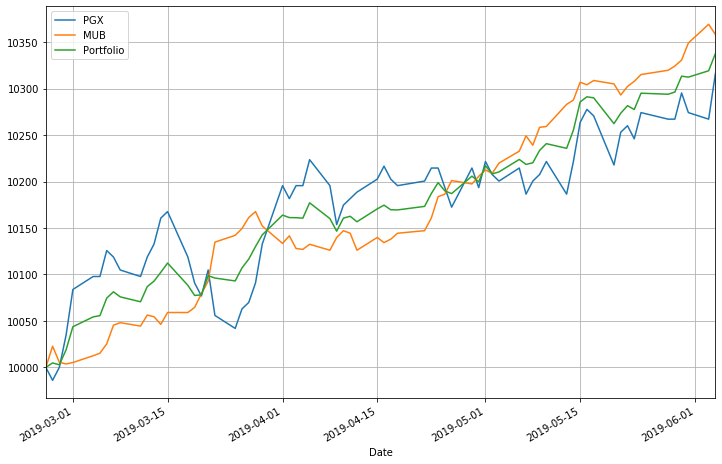

In [6]:
quote.graph(21, {'MUB': .51, 'PGX': .49})